In [97]:
%pylab
%matplotlib inline
import seaborn as sns
import pickle as pkl
from glob import glob
from matplotlib import ticker
import pandas as pd
import matplotlib.ticker as mtick

sns.set_theme("notebook")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/home/rohitrango/data/miniconda3/envs/cudants/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table', 'hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [98]:
sns.set_context("talk", font_scale=1.5)

In [99]:
# helper functions
def load_pickle(path):
    with open(path, "rb") as fi:
        data = pkl.load(fi)
    return data

def load_time_from_txt(path):
    with open(path, 'r') as fi:
        data = fi.read().replace('\t', '').split('\n')
    realtime = list(filter(lambda x: x.startswith('real '), data))[0]
    realtime = float(realtime.split(' ')[-1])
    return realtime

def load_files_ants(path, offset=1):
    time_path = glob(path + "/time*.txt")
    result = dict()
    for t in time_path:
        fid, mid = t.split('/')[-1].split('.')[0].split("_")[1:]
        fid, mid = int(fid) - offset, int(mid) - offset
        time = load_time_from_txt(t)
        result[(fid, mid)] = time
    return result

def compute_speedup(ours, ants, ours_mult=2.0, ants_mult=8.0):
    ''' given two dictionaries of timings, return dict of speedups '''
    s = dict()
    for k in ours.keys():
        s[k] = (ants[k] * ants_mult)/(ours[k] * ours_mult)
    return s

In [100]:
def compute_table(speedup, ants, ours):
    ''' given speedup dict, ants dict, and ours dict, return table'''
    table = []
    speedup_vals = list(speedup.values())
    ants_vals = np.array(list(ants.values())) * 8.0
    ours_vals = np.array(list(ours.values())) * 2.0
    # now print min max avg
    # table.append([min(speedup_vals), max(speedup_vals), np.mean(speedup_vals)])
    # table.append([min(ants_vals), max(ants_vals), np.mean(ants_vals)])
    # table.append([min(ours_vals), max(ours_vals), np.mean(ours_vals)])
    table.append(["Avg", np.mean(ants_vals), np.mean(ours_vals), np.mean(speedup_vals)])
    table.append(["Min", min(ants_vals), min(ours_vals), min(speedup_vals)])
    table.append(["Max", max(ants_vals), max(ours_vals), max(speedup_vals)])
    for i, row in enumerate(table):
        table[i] = table[i][:1] + [np.around(x, 2) for x in row[1:]]

    return pd.DataFrame(table, columns=["", "Ants", "Ours", "Speedup"])
    

In [101]:
# IBSR
ibsr_ours = load_pickle("../scripts/ibsr/all_times_greedy.pkl")
ibsr_ants = load_files_ants("/data/rohitrango/brain_data/IBSR18/ANTS/outputs")

In [102]:
speedup = compute_speedup(ibsr_ours, ibsr_ants)
table = compute_table(speedup, ibsr_ants, ibsr_ours)
print(table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
    &     Ants &  Ours &  Speedup \\
\midrule
Avg & 10380.57 &  6.11 &  1701.01 \\
Min &  8645.76 &  5.87 &  1424.66 \\
Max & 11438.96 &  6.99 &  1930.78 \\
\bottomrule
\end{tabular}



In [103]:
speedup_arr = np.array(list(speedup.values()))

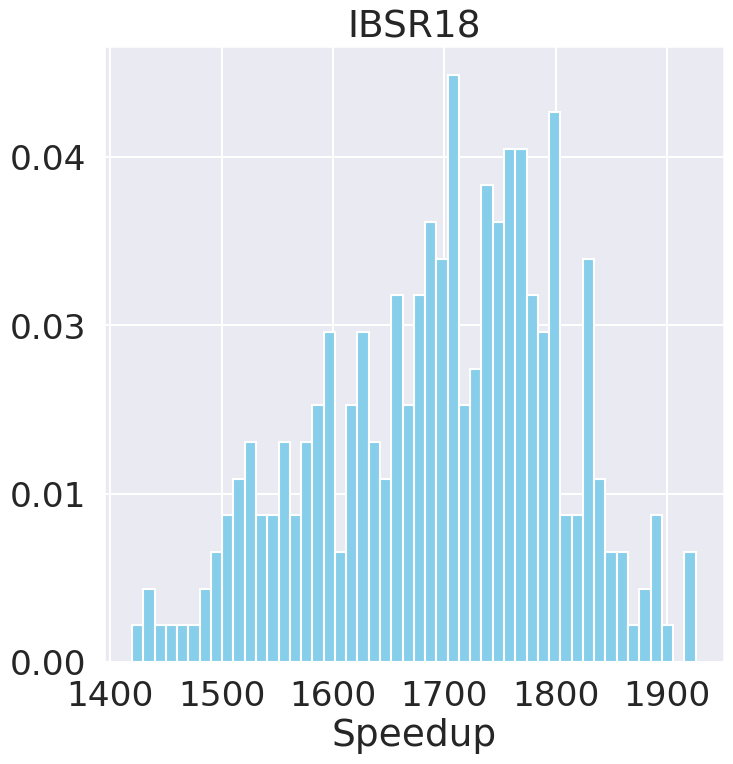

In [104]:
# plot histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.histplot(speedup_arr, bins=50, color='skyblue', kde=True)
hist, values = np.histogram(speedup_arr, bins=50)
hist = np.array(hist).astype(float)
hist /= np.sum(hist)

# sns.barplot(x=values[:-1], y=hist, color='skyblue', ax=ax)
ax.bar(values[:-1], hist, width=values[1]-values[0], color='skyblue')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.xlabel('Speedup')
plt.ylabel('')
plt.title('IBSR18')
# plt.xlim(1200, 3200)
# plt.show()
plt.savefig("ibsr_timing.pdf", bbox_inches='tight')

[ 1  2  1  1  1  1  2  3  4  5  6  4  4  6  4  6  7  9  3  7  9  6  5 10
  7 10 12 11 16  7  8 13 12 14 14 10  9 15  4  4 11  5  3  3  1  2  4  1
  0  3]


In [105]:
# CUMC12
cumc_ours = load_pickle("../scripts/cumc12/all_times_greedy.pkl")
cumc_ants = load_files_ants("/data/rohitrango/brain_data/CUMC12/ANTS/outputs")

In [106]:
speedup = compute_speedup(cumc_ours, cumc_ants)
speedup_arr = np.array(list(speedup.values()))
table = compute_table(speedup, cumc_ants, cumc_ours)
print(table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
    &     Ants &  Ours &  Speedup \\
\midrule
Avg & 15497.14 &  6.30 &  2475.39 \\
Min & 13298.00 &  5.79 &  2002.77 \\
Max & 18983.44 &  6.80 &  3270.91 \\
\bottomrule
\end{tabular}



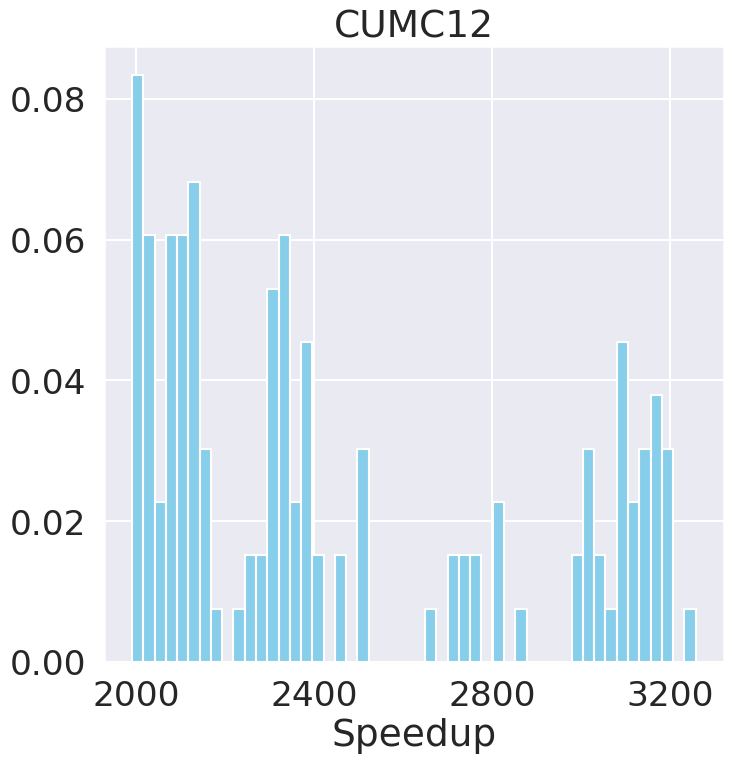

In [107]:
# plot histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.histplot(speedup_arr, bins=50, color='skyblue', kde=True)
hist, values = np.histogram(speedup_arr, bins=50)
hist = np.array(hist).astype(float)
hist /= np.sum(hist)

# sns.barplot(x=values[:-1], y=hist, color='skyblue', ax=ax)
ax.bar(values[:-1], hist, width=values[1]-values[0], color='skyblue')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))

plt.xlabel('Speedup')
plt.ylabel('')
plt.title('CUMC12')
# plt.xlim(1200, 3200)

# plt.show()
plt.savefig("cumc_timing.pdf", bbox_inches='tight')

In [108]:
# MGH10
ours = load_pickle("../scripts/mgh10/all_times_greedy.pkl")
ants = load_files_ants("/data/rohitrango/brain_data/MGH10/ANTS/outputs")

In [109]:
speedup = compute_speedup(ours, ants)
speedup_arr = np.array(list(speedup.values()))
table = compute_table(speedup, ants, ours)
print(table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
    &     Ants &  Ours &  Speedup \\
\midrule
Avg & 10558.51 &  4.25 &  2486.57 \\
Min &  5796.64 &  3.66 &  1187.98 \\
Max & 15524.08 &  4.88 &  3773.99 \\
\bottomrule
\end{tabular}



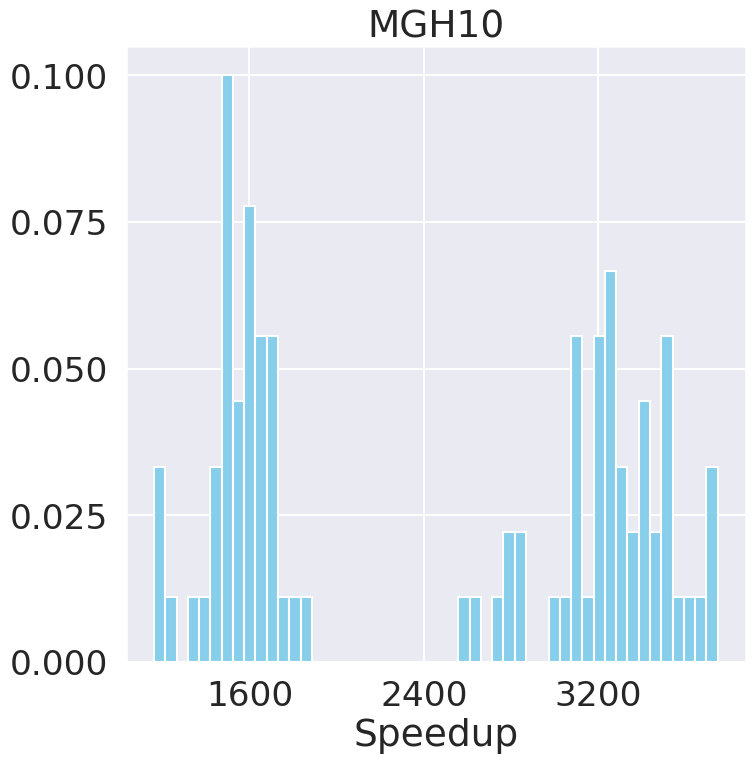

In [111]:
# plot histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.histplot(speedup_arr, bins=50, color='skyblue', kde=True)
hist, values = np.histogram(speedup_arr, bins=50)
hist = np.array(hist).astype(float)
hist /= np.sum(hist)

# sns.barplot(x=values[:-1], y=hist, color='skyblue', ax=ax)
ax.bar(values[:-1], hist, width=values[1]-values[0], color='skyblue')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))

plt.xlabel('Speedup')
plt.ylabel('')
plt.title('MGH10')
# plt.xlim(1200, 3200)

# plt.show()
plt.savefig("mgh_timing.pdf", bbox_inches='tight')

In [112]:
# LPBA40
ours = load_pickle("../scripts/lpba40/all_times_greedy.pkl")
ants = load_files_ants("/data/rohitrango/brain_data/LPBA40/ANTS/outputs", offset=0)

In [113]:
speedup = compute_speedup(ours, ants)
speedup_arr = np.array(list(speedup.values()))
table = compute_table(speedup, ants, ours)
print(table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
    &     Ants &  Ours &  Speedup \\
\midrule
Avg &  7273.74 &  7.02 &  1036.03 \\
Min &  5692.80 &  6.36 &   821.20 \\
Max & 12068.08 &  7.66 &  1635.29 \\
\bottomrule
\end{tabular}



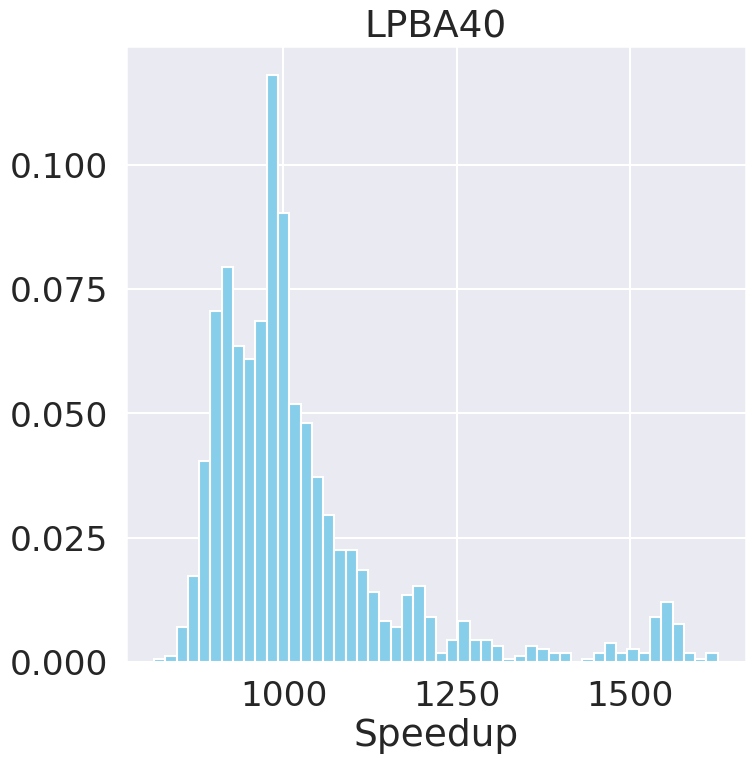

In [114]:
# plot histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# sns.histplot(speedup_arr, bins=50, color='skyblue', kde=True)
hist, values = np.histogram(speedup_arr, bins=50)
hist = np.array(hist).astype(float)
hist /= np.sum(hist)

# sns.barplot(x=values[:-1], y=hist, color='skyblue', ax=ax)
ax.bar(values[:-1], hist, width=values[1]-values[0], color='skyblue')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))

plt.xlabel('Speedup')
plt.ylabel('')
plt.title('LPBA40')
# plt.xlim(1200, 3200)

# plt.show()
plt.savefig("lpba_timing.pdf", bbox_inches='tight')